In [1]:
%matplotlib inline

#maplot 결과를 interaction bar없이 그림으로만 보여준다. 

In [2]:
pip install PySoundFile

Note: you may need to restart the kernel to use updated packages.


In [4]:
#https://stackoverflow.com/questions/62543843/cannot-import-torch-audio-no-audio-backend-is-available
import soundfile as sf

In [5]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

1.12.1
0.12.1


In [4]:
!pip install boto3
#Boto3는 AWS에서 제공하는 SDK이다. python 애플리케이션과 AWS 서비스를 연결시키기 위해 사용된다
#S3로 부터 다운받는 예제에 사용.

  Using cached boto3-1.24.56-py3-none-any.whl (132 kB)
  Using cached s3transfer-0.6.0-py3-none-any.whl (79 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached botocore-1.27.56-py3-none-any.whl (9.1 MB)


For linux , mac

In [13]:
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset # 최신 버전의 torchaudio에서 사용 가능한 기능

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm") # windows에서는 gsm 형태를 사용할 수 없다.
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")

100.0%


For windows

In [ ]:
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset # 최신 버전의 torchaudio에서 사용 가능한 기능

SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")

windows에선 GSM 파일을 사용할 수 없습니다. (Pysoundfile 사용 때문.)

다음과 같이 주석처리 해주세요.

```python

# SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")

```



# 음성 파일 조회

## path 제공 방식

In [11]:
SAMPLE_WAV

'C:\\Users\\dlwhd\\.cache\\torch\\hub\\torchaudio\\tutorial-assets\\Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav'

In [8]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [21]:
metadata = torchaudio.info(SAMPLE_GSM)
print(metadata)

RuntimeError: Error opening 'C:\\Users\\dlwhd\\.cache\\torch\\hub\\torchaudio\\tutorial-assets\\steam-train-whistle-daniel_simon.gsm': File contains data in an unknown format.

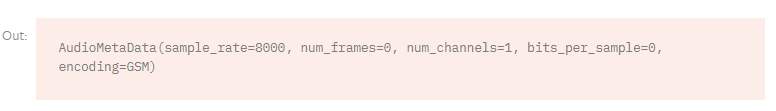

In [47]:
torchaudio.load(SAMPLE_WAV)

(tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]]), 16000)

In [48]:
!python --version

Python 3.9.13


In [49]:
response.raw

In [30]:
url = "https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav"
with requests.get(url, stream=True) as response:
    metadata = torchaudio.info(response.raw)
print(metadata)

Exception ignored from cffi callback <function SoundFile._init_virtual_io.<locals>.vio_get_filelen at 0x000002CCD8558A60>:
Traceback (most recent call last):
  File "D:\minicondas\audio_tutorial\lib\site-packages\soundfile.py", line 1280, in vio_get_filelen
    file.seek(0, SEEK_END)
io.UnsupportedOperation: seek


RuntimeError: Error opening <urllib3.response.HTTPResponse object at 0x000002CCD85DFCD0>: Error in WAV file. No 'data' chunk marker.

For windows

윈도우 Pysoundfile은 path like 객체에서만 동작합니다.

따라서, 파일을 다운로드하고, path를 넘겨주는 방식으로 동작합니다.

In [51]:
import requests
#file 같은 객체 호출 방법

#기차소리
url = "https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav"

with requests.get(url, stream=True) as response:
    with open('./steam-train-whistle-daniel_simon.wav', 'wb') as f:
        f.write(doc.content)
        metadata = torchaudio.info('./steam-train-whistle-daniel_simon.wav')
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)


In [28]:
# for windows
#file 같은 객체 호출 방법
import requests

doc = requests.get('https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav')
#기차소리
metadata = torchaudio.info(doc.raw)
print(metadata)

Exception ignored from cffi callback <function SoundFile._init_virtual_io.<locals>.vio_get_filelen at 0x000002CCD847BCA0>:
Traceback (most recent call last):
  File "D:\minicondas\audio_tutorial\lib\site-packages\soundfile.py", line 1280, in vio_get_filelen
    file.seek(0, SEEK_END)
io.UnsupportedOperation: seek


RuntimeError: Error opening <urllib3.response.HTTPResponse object at 0x000002CCD85418B0>: File contains data in an unknown format.

In [44]:
doc.content

b'RIFF\x04\xad\x06\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00D\xac\x00\x00\x10\xb1\x02\x00\x04\x00\x10\x00data\xe0\xac\x06\x00Y\x00\x85\xff\xd0\x00\xce\xff/\x01+\x00e\x01P\x00u\x01X\x00{\x01\x86\x00\xc9\x01\xf2\x00\xfc\x01T\x01\x11\x02}\x01[\x02\xae\x013\x02\xef\x01\x0c\x02\r\x02\x1c\x02\r\x02\xef\x01\x1c\x02\xc6\x01C\x02\xb9\x01S\x02\xd1\x01K\x02\xa5\x01U\x02Y\x01X\x023\x01:\x02\x14\x01\x18\x02\x03\x01\x00\x02\xf2\x00\x05\x02\xe0\x00\x15\x02\x83\x00\xf0\x01,\x00\xab\x01\x17\x00\x86\x01\x0b\x00\x82\x01\xf2\xffy\x01\xf3\xffz\x01T\x00\xb4\x01v\x00\xe9\x01K\x00\xdb\x01%\x00\xd4\x01\x0f\x00\xe9\x01\x01\x00\xd3\x01\xe6\xff\xa5\x01\xec\xff\x9e\x01\xe0\xff\xa8\x01\xac\xff\x7f\x01f\xffI\x01)\xff|\x01\x11\xff\xcf\x01\x08\xff\xce\x01\x0f\xff\xe1\x01#\xff\x15\x02\xe8\xfe\x0b\x02u\xfe\xfe\x01u\xfe\x0e\x02\x92\xfe$\x02\x90\xfeF\x02\xb1\xfe\x17\x02\xd3\xfe\xcc\x01\xd6\xfe\x12\x02\xdc\xfe\xa7\x02\x08\xff\x14\x03)\xffI\x03_\xff3\x03\xa8\xff"\x03\xd6\xffR\x03\xad\xffk\x03\x80\xffl\x03\x98\xff\x88\x03\

In [46]:
torchaudio.info("https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav")

RuntimeError: Error opening 'https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav': System error.

In [33]:
import requests

doc = requests.get('https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav')
with open('movie.mp3', 'wb') as f:
    f.write(doc.content)

TypeError: a bytes-like object is required, not 'HTTPResponse'

In [27]:
# Load audio data as HTTP request
url = "https://download.pytorch.org/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
with requests.get(url, stream=True) as response:
    waveform, sample_rate = torchaudio.load(response.raw)
plot_specgram(waveform, sample_rate, title="HTTP datasource")

From cffi callback <function SoundFile._init_virtual_io.<locals>.vio_get_filelen at 0x0000020EB962ACA8>:
Traceback (most recent call last):
  File "C:\Users\dlwhd\AppData\Roaming\Python\Python37\site-packages\soundfile.py", line 1199, in vio_get_filelen
    file.seek(0, SEEK_END)
io.UnsupportedOperation: seek


RuntimeError: Error opening <urllib3.response.HTTPResponse object at 0x0000020EB8BC6588>: Error in WAV file. No 'data' chunk marker.